In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [49]:
heartdata = pd.read_csv('heart_kaggle_project.csv')
#leaving out some data checks and descriptive statistics because contained in data transformation and scouting NB

In [50]:
heartdata = heartdata.reindex(np.random.permutation(heartdata.index))

In [51]:
heartdata = heartdata.reset_index(drop=True)
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
1,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
2,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
3,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
4,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [52]:
#scaling continuous variables, I am including restecg, slope, and ca because I think of
#these as directional values, not categorical

In [53]:
heartdata[['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca']] = StandardScaler().fit_transform(heartdata[['age', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak', 'slope', 'ca']])
heartdata.head()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.805024,1,2,0.364165,-1.377212,0,0.898962,1.021244,0,-0.896862,0.976352,3.203615,2,1
1,-2.797624,1,1,-0.092738,-0.816773,0,-1.005832,2.289429,0,-0.896862,0.976352,-0.714429,2,1
2,0.290464,1,0,0.021488,-0.758796,0,0.898962,0.802592,1,-0.896862,0.976352,-0.714429,3,1
3,0.400752,1,2,0.021488,-0.430263,0,-1.005832,1.021244,0,1.863764,0.976352,1.244593,3,0
4,1.503641,1,0,0.706843,-1.029353,1,0.898962,-0.378132,0,2.036303,-0.649113,1.244593,3,0


In [54]:
#drop categorical values
x = heartdata.drop(['sex', 'cp', 'fbs', 'exang', 'thal', 'target'], axis = 1)
x.head()

,age,trestbps,chol,restecg,thalach,oldpeak,slope,ca
0,-1.805024,0.364165,-1.377212,0.898962,1.021244,-0.896862,0.976352,3.203615
1,-2.797624,-0.092738,-0.816773,-1.005832,2.289429,-0.896862,0.976352,-0.714429
2,0.290464,0.021488,-0.758796,0.898962,0.802592,-0.896862,0.976352,-0.714429
3,0.400752,0.021488,-0.430263,-1.005832,1.021244,1.863764,0.976352,1.244593
4,1.503641,0.706843,-1.029353,0.898962,-0.378132,2.036303,-0.649113,1.244593


In [55]:
y = heartdata['target']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [57]:
pca.explained_variance_ratio_

array([0.29109979, 0.16025912])

In [58]:
print((pca.explained_variance_ratio_).sum())

0.4513589110270839


In [95]:
finalDf = pd.concat([principalDf, heartdata[['target']]], axis = 1)
finalDf.head()

,PC1,PC2,target
0,-1.355121,-0.176535,1
1,-3.244185,0.068574,1
2,-1.556297,0.050934,1
3,0.646668,0.518738,0
4,2.315322,-0.964942,0


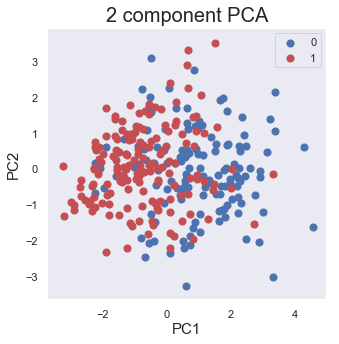

In [96]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [97]:
#not very satisfying - and it's known correlation between target and some categorical data is "good"
#so adding in sex, cp, exang, thal 

In [98]:
x_d = pd.get_dummies(heartdata, columns=['sex', 'cp', 'exang', 'thal'])
x_d = x_d.drop('target', axis = 1)
x_d.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,sex_0,...,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,-1.805024,0.364165,-1.377212,0,0.898962,1.021244,-0.896862,0.976352,3.203615,0,...,0,0,1,0,1,0,0,0,1,0
1,-2.797624,-0.092738,-0.816773,0,-1.005832,2.289429,-0.896862,0.976352,-0.714429,0,...,0,1,0,0,1,0,0,0,1,0
2,0.290464,0.021488,-0.758796,0,0.898962,0.802592,-0.896862,0.976352,-0.714429,0,...,1,0,0,0,0,1,0,0,0,1
3,0.400752,0.021488,-0.430263,0,-1.005832,1.021244,1.863764,0.976352,1.244593,0,...,0,0,1,0,1,0,0,0,0,1
4,1.503641,0.706843,-1.029353,1,0.898962,-0.378132,2.036303,-0.649113,1.244593,0,...,1,0,0,0,1,0,0,0,0,1


In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_d)
principalDf2 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [100]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318])

In [101]:
print((pca.explained_variance_ratio_).sum())

0.3796488637537201


In [102]:
finalDf2 = pd.concat([principalDf2, heartdata[['target']]], axis = 1)
finalDf2.head()

,PC1,PC2,target
0,-1.533727,-0.390437,1
1,-3.354001,-0.255567,1
2,-1.027965,-0.347546,1
3,0.580918,0.406145,0
4,2.416240,-0.791179,0


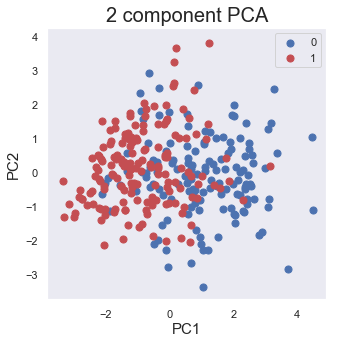

In [103]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [104]:
#Completely the same - the top 2 pricipal components are in the true numerical 
#data (age,trestbps,chol,restecg,thalach,oldpeak,slope, ca).
#However, added variables cause PC1, PC2  to contribute less to the overall variance 

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_d)
principalDf3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [110]:
pca.explained_variance_ratio_

array([0.24981568, 0.12983318, 0.09876902])

In [111]:
print((pca.explained_variance_ratio_).sum())

0.47841788189764056


In [112]:
# even with 3 components, less than 50% of variance explained, will run models anyway...

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers = []
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)
SVMmodel = svm.SVC()
classifiers.append(SVMmodel)
DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)
KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)
LRmodel = LogisticRegression()
classifiers.append(LRmodel)

In [114]:
# 3 component modeled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf3, y, test_size=0.2) 
from sklearn import metrics
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print((i))
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9834710743801653
Accuracy:   0.7704918032786885
Confusion Matrix: 
[[20  1]
 [13 27]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.8181818181818182
Accuracy:   0.819672131147541
Confusion Matrix: 
[[18  3]
 [ 8 32]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
       

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
# Nothing great with 3 components
# FIND COMPONENTS THAT EXPLAIN 95% OF VARIANCE AND THEN SCOUT MODELS

In [116]:
pca = PCA(.95)

In [117]:
new_x = pca.fit_transform(x_d)

In [118]:
pca.n_components_ 

12

In [119]:
#Based on 2 component visualization - there is obviously 2 clusters but with significant overlap
#the 2 component and 3 component analysis preserved less than 50% 
#It takes 12 components to preserve 95% of the variance...
#Because of this and because we are working with a small data set, while I will scout models with PCA(95% var) dataset, 
#I will likely optimize models with dataset from Data transformation and scouting NB
#... I gut is that PCA data reduction isn't real helpful in this case... we shall see....

In [121]:
pc12df = pd.DataFrame(data = new_x, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12'])
pc12df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.533727,-0.390437,-2.138758,-0.184942,-2.669876,1.715781,0.564457,1.539610,-0.248629,-0.436942,0.532957,0.246666
1,-3.354001,-0.255567,1.634046,-0.903017,-1.628028,0.738384,-0.249063,0.389393,0.101363,0.030024,0.014185,-0.560676
2,-1.027965,-0.347546,-0.628777,0.503241,-0.288288,-0.329895,-1.431606,-1.027529,-0.132691,1.130016,0.011008,0.357344
3,0.580918,0.406145,-0.150102,-0.640345,-1.675579,1.009496,0.862956,-1.400193,1.253140,-0.635403,-0.227395,0.785171
4,2.416240,-0.791179,-1.035325,1.122765,-1.133544,0.346052,0.692611,-1.058816,0.380855,0.006882,-0.496954,-0.223289


In [126]:
# 13 components - model scouting 
Xtrain, Xtest, ytrain, ytest = train_test_split(pc12df, y, test_size=0.2)
for i in classifiers:
    i.fit(Xtrain, ytrain)
    ypred= i.predict(Xtest)
    print((i))
    print('Model score: ', i.score(Xtrain, ytrain))
    print("Accuracy:  ", metrics.accuracy_score(ytest, ypred))
    cm = metrics.confusion_matrix(ytest, ypred)
    print("Confusion Matrix: ")
    print(cm)
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9834710743801653
Accuracy:   0.8032786885245902
Confusion Matrix: 
[[25  5]
 [ 7 24]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.8884297520661157
Accuracy:   0.9508196721311475
Confusion Matrix: 
[[28  2]
 [ 1 30]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
      

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
#Well - this worked pretty well!!!! Even overfit RF and DT have better scores 
#will work on optimize a select group for low false negatives

In [128]:
#Logistic regression
#solver - liblinear good for small datasets, vary penalty
varyc = [1, 10, 100]
for i in varyc:
    meanmodelscore = []
    meanlogreg = []
    for j in range(1,11):
        Xtrain, Xtest, ytrain, ytest = train_test_split(pc12df, y, test_size=0.2)
        logreg = LogisticRegression(C=i, solver='liblinear')
        logreg.fit(Xtrain, ytrain)
        ypred=logreg.predict(Xtest)
        modelscore = logreg.score(Xtrain, ytrain)
        print('Model score: ', modelscore)
        meanmodelscore.append(modelscore)
        print("Accuracy:", metrics.accuracy_score(ytest, ypred))
        acc = metrics.accuracy_score(ytest, ypred)
        meanlogreg.append(acc)
        cm = metrics.confusion_matrix(ytest, ypred)
        print("Confusion Matrix: ")
        print(cm)
    print('C =', i)
    print("mean model score:", np.array(meanlogreg).mean())
    print("mean accuracy:", np.array(meanmodelscore).mean())
    print()

Model score:  0.8553719008264463
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[26  4]
 [ 5 26]]
Model score:  0.8512396694214877
Accuracy: 0.8852459016393442
Confusion Matrix: 
[[20  4]
 [ 3 34]]
Model score:  0.8636363636363636
Accuracy: 0.819672131147541
Confusion Matrix: 
[[21  4]
 [ 7 29]]
Model score:  0.8636363636363636
Accuracy: 0.8360655737704918
Confusion Matrix: 
[[25  4]
 [ 6 26]]
Model score:  0.8471074380165289
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[23  5]
 [ 4 29]]
Model score:  0.8677685950413223
Accuracy: 0.819672131147541
Confusion Matrix: 
[[19  7]
 [ 4 31]]
Model score:  0.8677685950413223
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[21  5]
 [ 4 31]]
Model score:  0.8512396694214877
Accuracy: 0.819672131147541
Confusion Matrix: 
[[18  6]
 [ 5 32]]
Model score:  0.871900826446281
Accuracy: 0.7540983606557377
Confusion Matrix: 
[[19 10]
 [ 5 27]]
Model score:  0.859504132231405
Accuracy: 0.819672131147541
Confusion Matrix: 
[[22  6]
 [ 5 28]]
C = 1


In [44]:
#Well - this worked pretty well!!!! Principal Conponents modeled with logistic Regression!!!!
#except false negatives higher than I'd like - thinking about trying this as my model but changing 
#the "probability balance" (don't know what its called) so false neg minimize 
svm.SVC?


In [130]:
#Logistic regression
#solver - liblinear good for small datasets, vary penalty
from sklearn import svm, datasets
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    meanmodelscore = []
    meanlogreg = []
    for j in range(1,11):
        Xtrain, Xtest, ytrain, ytest = train_test_split(pc12df, y, test_size=0.2)
        SVMmodel = svm.SVC(kernel = k)
        SVMmodel.fit(Xtrain, ytrain)
        ypred=SVMmodel.predict(Xtest)
        modelscore = SVMmodel.score(Xtrain, ytrain)
        print('Model score: ', modelscore)
        meanmodelscore.append(modelscore)
        print("Accuracy:", metrics.accuracy_score(ytest, ypred))
        acc = metrics.accuracy_score(ytest, ypred)
        meanlogreg.append(acc)
        cm = metrics.confusion_matrix(ytest, ypred)
        print("Confusion Matrix: ")
        print(cm)
  
    print("mean model score:", np.array(meanlogreg).mean())
    print("mean accuracy:", np.array(meanmodelscore).mean())
    print()

Model score:  0.8471074380165289
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[21  7]
 [ 2 31]]
Model score:  0.8471074380165289
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[23  6]
 [ 3 29]]
Model score:  0.8760330578512396
Accuracy: 0.7704918032786885
Confusion Matrix: 
[[18  9]
 [ 5 29]]
Model score:  0.8471074380165289
Accuracy: 0.8524590163934426
Confusion Matrix: 
[[22  8]
 [ 1 30]]
Model score:  0.8553719008264463
Accuracy: 0.8032786885245902
Confusion Matrix: 
[[17  6]
 [ 6 32]]
Model score:  0.8429752066115702
Accuracy: 0.8688524590163934
Confusion Matrix: 
[[17  6]
 [ 2 36]]
Model score:  0.8512396694214877
Accuracy: 0.7704918032786885
Confusion Matrix: 
[[18  8]
 [ 6 29]]
Model score:  0.8553719008264463
Accuracy: 0.8032786885245902
Confusion Matrix: 
[[23  8]
 [ 4 26]]
Model score:  0.8429752066115702
Accuracy: 0.8688524590163934
Confusion Matrix: 
[[22  3]
 [ 5 31]]
Model score:  0.8677685950413223
Accuracy: 0.8032786885245902
Confusion Matrix: 
[[22  5]
 [ 7 27]]


C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Model score:  0.9049586776859504
Accuracy: 0.7868852459016393
Confusion Matrix: 
[[24 11]
 [ 2 24]]
Model score:  0.9090909090909091
Accuracy: 0.819672131147541
Confusion Matrix: 
[[21  5]
 [ 6 29]]
Model score:  0.8801652892561983
Accuracy: 0.8360655737704918
Confusion Matrix: 
[[21  5]
 [ 5 30]]
Model score:  0.9008264462809917
Accuracy: 0.8688524590163934
Confusion Matrix: 
[[20  5]
 [ 3 33]]
Model score:  0.8966942148760331
Accuracy: 0.819672131147541
Confusion Matrix: 
[[19  4]
 [ 7 31]]
mean model score: 0.8229508196721312
mean accuracy: 0.8987603305785123

Model score:  0.8553719008264463
Accuracy: 0.7868852459016393
Confusion Matrix: 
[[17 12]
 [ 1 31]]
Model score:  0.8471074380165289
Accuracy: 0.819672131147541
Confusion Matrix: 
[[20  7]
 [ 4 30]]
Model score:  0.8636363636363636
Accuracy: 0.7704918032786885
Confusion Matrix: 
[[18 13]
 [ 1 29]]
Model score:  0.8429752066115702
Accuracy: 0.7704918032786885
Confusion Matrix: 
[[19 13]
 [ 1 28]]
Model score:  0.855371900826446

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni